# Introduction

In this practical, we are required to explore the data and perform a simple linear regression using the Temperature dataset provided, display a scatter plot with a regresion line thereafter use the coefficient and intercept values calculated by the estimator to make predictions for 2019

# 1) Performing the Simple Linear Regression

# Loading the Average High Temparatures into a DataFrame

Peform data cleaning with pandas and numpy. First load the data from the temp_nyc_1895-2018.csv, rename the column 'value' to 'temperature', remove 01 from the end of each value and display a few data samples.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to enable matplotlibin this notebook

In [ ]:
myData = pd.read_csv(r"C:\\Users\\admin\\Desktop\\temp_nyc_1895-2018 (1).csv")

In [ ]:
myData

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4
7,190201,35.0,-2.4
8,190301,35.5,-1.9
9,190401,29.8,-7.6


# Explore the Data

In [ ]:
myData.head(5)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [ ]:
myData.columns=['Date', 'Temperature', 'Anomaly']

In [ ]:
myData.head(5)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [ ]:
myData.Date = myData.Date.floordiv(100)

In [ ]:
myData.head(5)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [ ]:
myData.columns

Index(['Date', 'Temperature', 'Anomaly'], dtype='object')

In [ ]:
myData=myData.drop(['Anomaly'], axis=1)

In [ ]:
myData.head(5)

,Date,Temperature
0,1895,34.2
1,1896,34.7
2,1897,35.5
3,1898,39.6
4,1899,36.4


In [ ]:
import seaborn as sns

(20, 50)

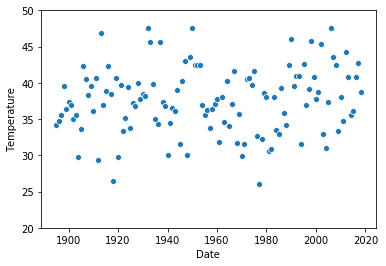

In [ ]:
axes=sns.scatterplot(data=myData, x='Date',y='Temperature')
axes.set_ylim(20,50)
#plt.plot(np.array(myData['Date'])np.array(myData['Temperature']))

# Splitting the data for the Training and Testing Set

The Linear Regression estimator is used from sklearn.linear_model which uses numerical values in a dataset to perform multiple linear regression. An independent variable and dependent variable is selected, in this case the independent variable being the Date, whole the dependent variable being the Temparature.

A column in a DataFrame is a one dimensional series. The Scikit-learn require the tarining and testing data in order to be in 2-Dimensional. We will change a series of n elements, into 2 dimensions, containing n rows and one column.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
len(myData['Temperature'])

124

In [ ]:
x=myData['Date']

In [ ]:
y=myData['Temperature']

In [ ]:
numTrain=98
numTest=len(y)-numTrain

In [ ]:
numTest # 80% for training, 20% for testing

26

In [ ]:
x_train=x[:numTrain]

In [ ]:
x_test=x[:-numTrain]

In [ ]:
len(x_test)

26

In [ ]:
len(x_train)

98

In [ ]:
y_train=y[:numTrain]

In [ ]:
len(y_train)

98

In [ ]:
y_test=y[:-numTrain]

In [ ]:
len(y_test)

26

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_train.shape

(98,)

In [ ]:
x_train=np.array(x_train)

In [ ]:
x_test=np.array(x_test)

In [ ]:
y_test=np.array(y_test)

In [ ]:
y_train=np.array(y_train)

In [ ]:
y_train=y_train.reshape(-1,1)

In [ ]:
y_train.shape

(98, 1)

In [ ]:
x_train=x_train.reshape(-1,1)

In [ ]:
x_train.shape

(98, 1)

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regr=linear_model.LinearRegression()

In [ ]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
x_test=x_test.reshape(-1,1)

In [ ]:
y_test=y_test.reshape(-1,1)

In [ ]:
x_train.shape

(98, 1)

In [ ]:
x_test.shape

(26, 1)

In [ ]:
y_test.shape

(26, 1)

In [ ]:
y_train.shape

(98, 1)

In [ ]:
y_pred_test=regr.predict(x_test)

In [ ]:
y_pred_test

array([[37.35058751],
       [37.34666208],
       [37.34273664],
       [37.33881121],
       [37.33488578],
       [37.33096035],
       [37.32703492],
       [37.32310949],
       [37.31918406],
       [37.31525862],
       [37.31133319],
       [37.30740776],
       [37.30348233],
       [37.2995569 ],
       [37.29563147],
       [37.29170604],
       [37.2877806 ],
       [37.28385517],
       [37.27992974],
       [37.27600431],
       [37.27207888],
       [37.26815345],
       [37.26422802],
       [37.26030258],
       [37.25637715],
       [37.25245172]])

Room Mean Squared Error = 4.5101
R-Squared = -0.0152


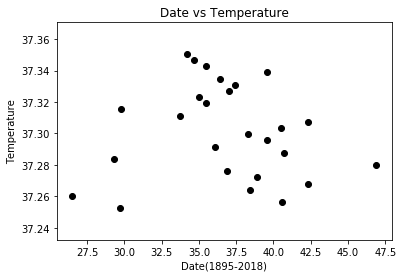

In [ ]:
plt.scatter(y_test,y_pred_test, color='black')
plt.title('Date vs Temperature')
plt.xlabel('Date(1895-2018)')
plt.ylabel('Temperature')
print('Room Mean Squared Error = %.4f'% np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R-Squared = %.4f'%r2_score(y_test,y_pred_test))


Finding the slope

In [ ]:
print('Slope =', regr.coef_[0][0])

Slope = -0.0039254314659322035


Finding the intercept

In [ ]:
print('Intercept =', regr.intercept_[0])

Intercept = 44.78928013567189


Text(0, 0.5, 'Temparature')

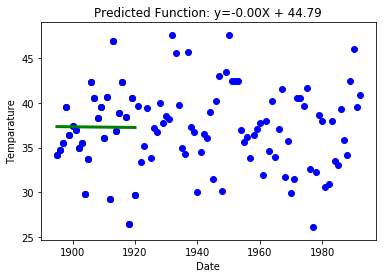

In [ ]:
plt.scatter(x_test,y_test, color='black')
plt.scatter(x_train,y_train, color='blue')
plt.plot(x_test,y_pred_test, color='green', linewidth=3)
titlestr='Predicted Function: y=%.2fX + %.2f'%(regr.coef_[0],regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('Date')
plt.ylabel('Temparature')

# Conclusion

Using the slope and intercept found, the linear equation derived from the model is:
    y = 0.00x + 44.79

We can then use this linear equation to solve for the temperatures of 2019 as follows:
    
    y(temperature) =(-0.0039254314659322035 * 2019) + 44.78928013567189
    
    y(temperature) =36.863834006

Therefore, the predicted temperature of 2019 is 36.863834006